Decision Tree Classifier

Build a model that predicts the Drug to be prescribed to the patients on basis of their medical results


Step1: Data Gathering

In [1]:
import pandas as pd
path = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/drug200.csv"
df = pd.read_csv(path)

In [2]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY



Step2: Perform the basic data quality checks

In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    str    
 2   BP           200 non-null    str    
 3   Cholesterol  200 non-null    str    
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    str    
dtypes: float64(1), int64(1), str(4)
memory usage: 9.5 KB


In [5]:
df['Drug'].unique()

<StringArray>
['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']
Length: 5, dtype: str

In [6]:
##check for duplicated information
df.duplicated().sum()

np.int64(0)

In [7]:
df=df.drop_duplicates()

In [8]:
#check for missing data
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Separate X and Y features

X: all features except Drug

Y: Drug

In [9]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [10]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


Feature Engineering: Data cleaning, Data preprocessing(Feature Scaling)

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

cat = list(X.select_dtypes(include='str').columns)
con = list(X.select_dtypes(include='number').columns)


num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con)
]).set_output(transform='pandas')

X_pre = pre.fit_transform(X)
X_pre.head()


,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.291591,1.286522
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.415145
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.828558
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.988614,-1.149963
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.011034,0.271794


Split the data into training and testing

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.66,random_state=21)

In [17]:
print(f"xtrain:{xtrain.shape}")
print(f"xtest:{xtest.shape}")
print(f"ytrain:{ytrain.shape}")
print(f"ytest:{ytest.shape}")

xtrain:(132, 9)
xtest:(68, 9)
ytrain:(132, 1)
ytest:(68, 1)


Model building- decision tree model

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=3,
    min_samples_split=5
)

model.fit(xtrain,ytrain)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",3
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [20]:
model.score(xtrain,ytrain)

1.0

In [21]:
model.score(xtest,ytest)

0.9705882352941176


Hyperparameter Tuning

criterion='gini',

max_depth=5,

min_samples_leaf=3,

min_samples_split=5

In [22]:
params ={
    'max_depth':[3,4,5,6,7],
    'min_samples_leaf':[1,2,3,4,5,9,11],
    'min_samples_split':[3,5,7,9,10],
    'criterion':['gini','entropy']
}

In [23]:
from sklearn.model_selection import RandomizedSearchCV
base_model = DecisionTreeClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [3, 5, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... vers

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


Model evaluation

In [24]:
rscv.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 4,
 'criterion': 'gini'}

In [25]:

rscv.best_score_

np.float64(0.9955510616784631)

In [26]:
best_dtc = rscv.best_estimator_
best_dtc

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",3
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [27]:
best_dtc.score(xtrain,ytrain)

1.0

In [28]:

best_dtc.score(xtest,ytest)

0.9705882352941176

Confusion Matrix and Classification Report

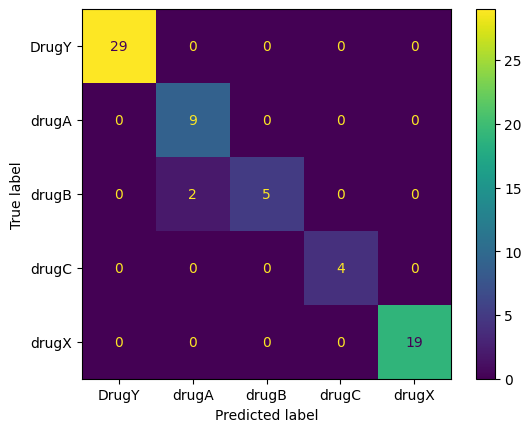

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc,xtest,ytest)

In [30]:
from sklearn.metrics import classification_report
ypreds = model.predict(xtest)
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        29
       drugA       0.82      1.00      0.90         9
       drugB       1.00      0.71      0.83         7
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19

    accuracy                           0.97        68
   macro avg       0.96      0.94      0.95        68
weighted avg       0.98      0.97      0.97        68



In [31]:
from sklearn.metrics import f1_score
f1 = f1_score(ytest,ypreds,average='macro')
f1

0.9466666666666667


Plot the decision tree

In [32]:

xtrain.columns

Index(['cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL',
       'con__Age', 'con__Na_to_K'],
      dtype='str')

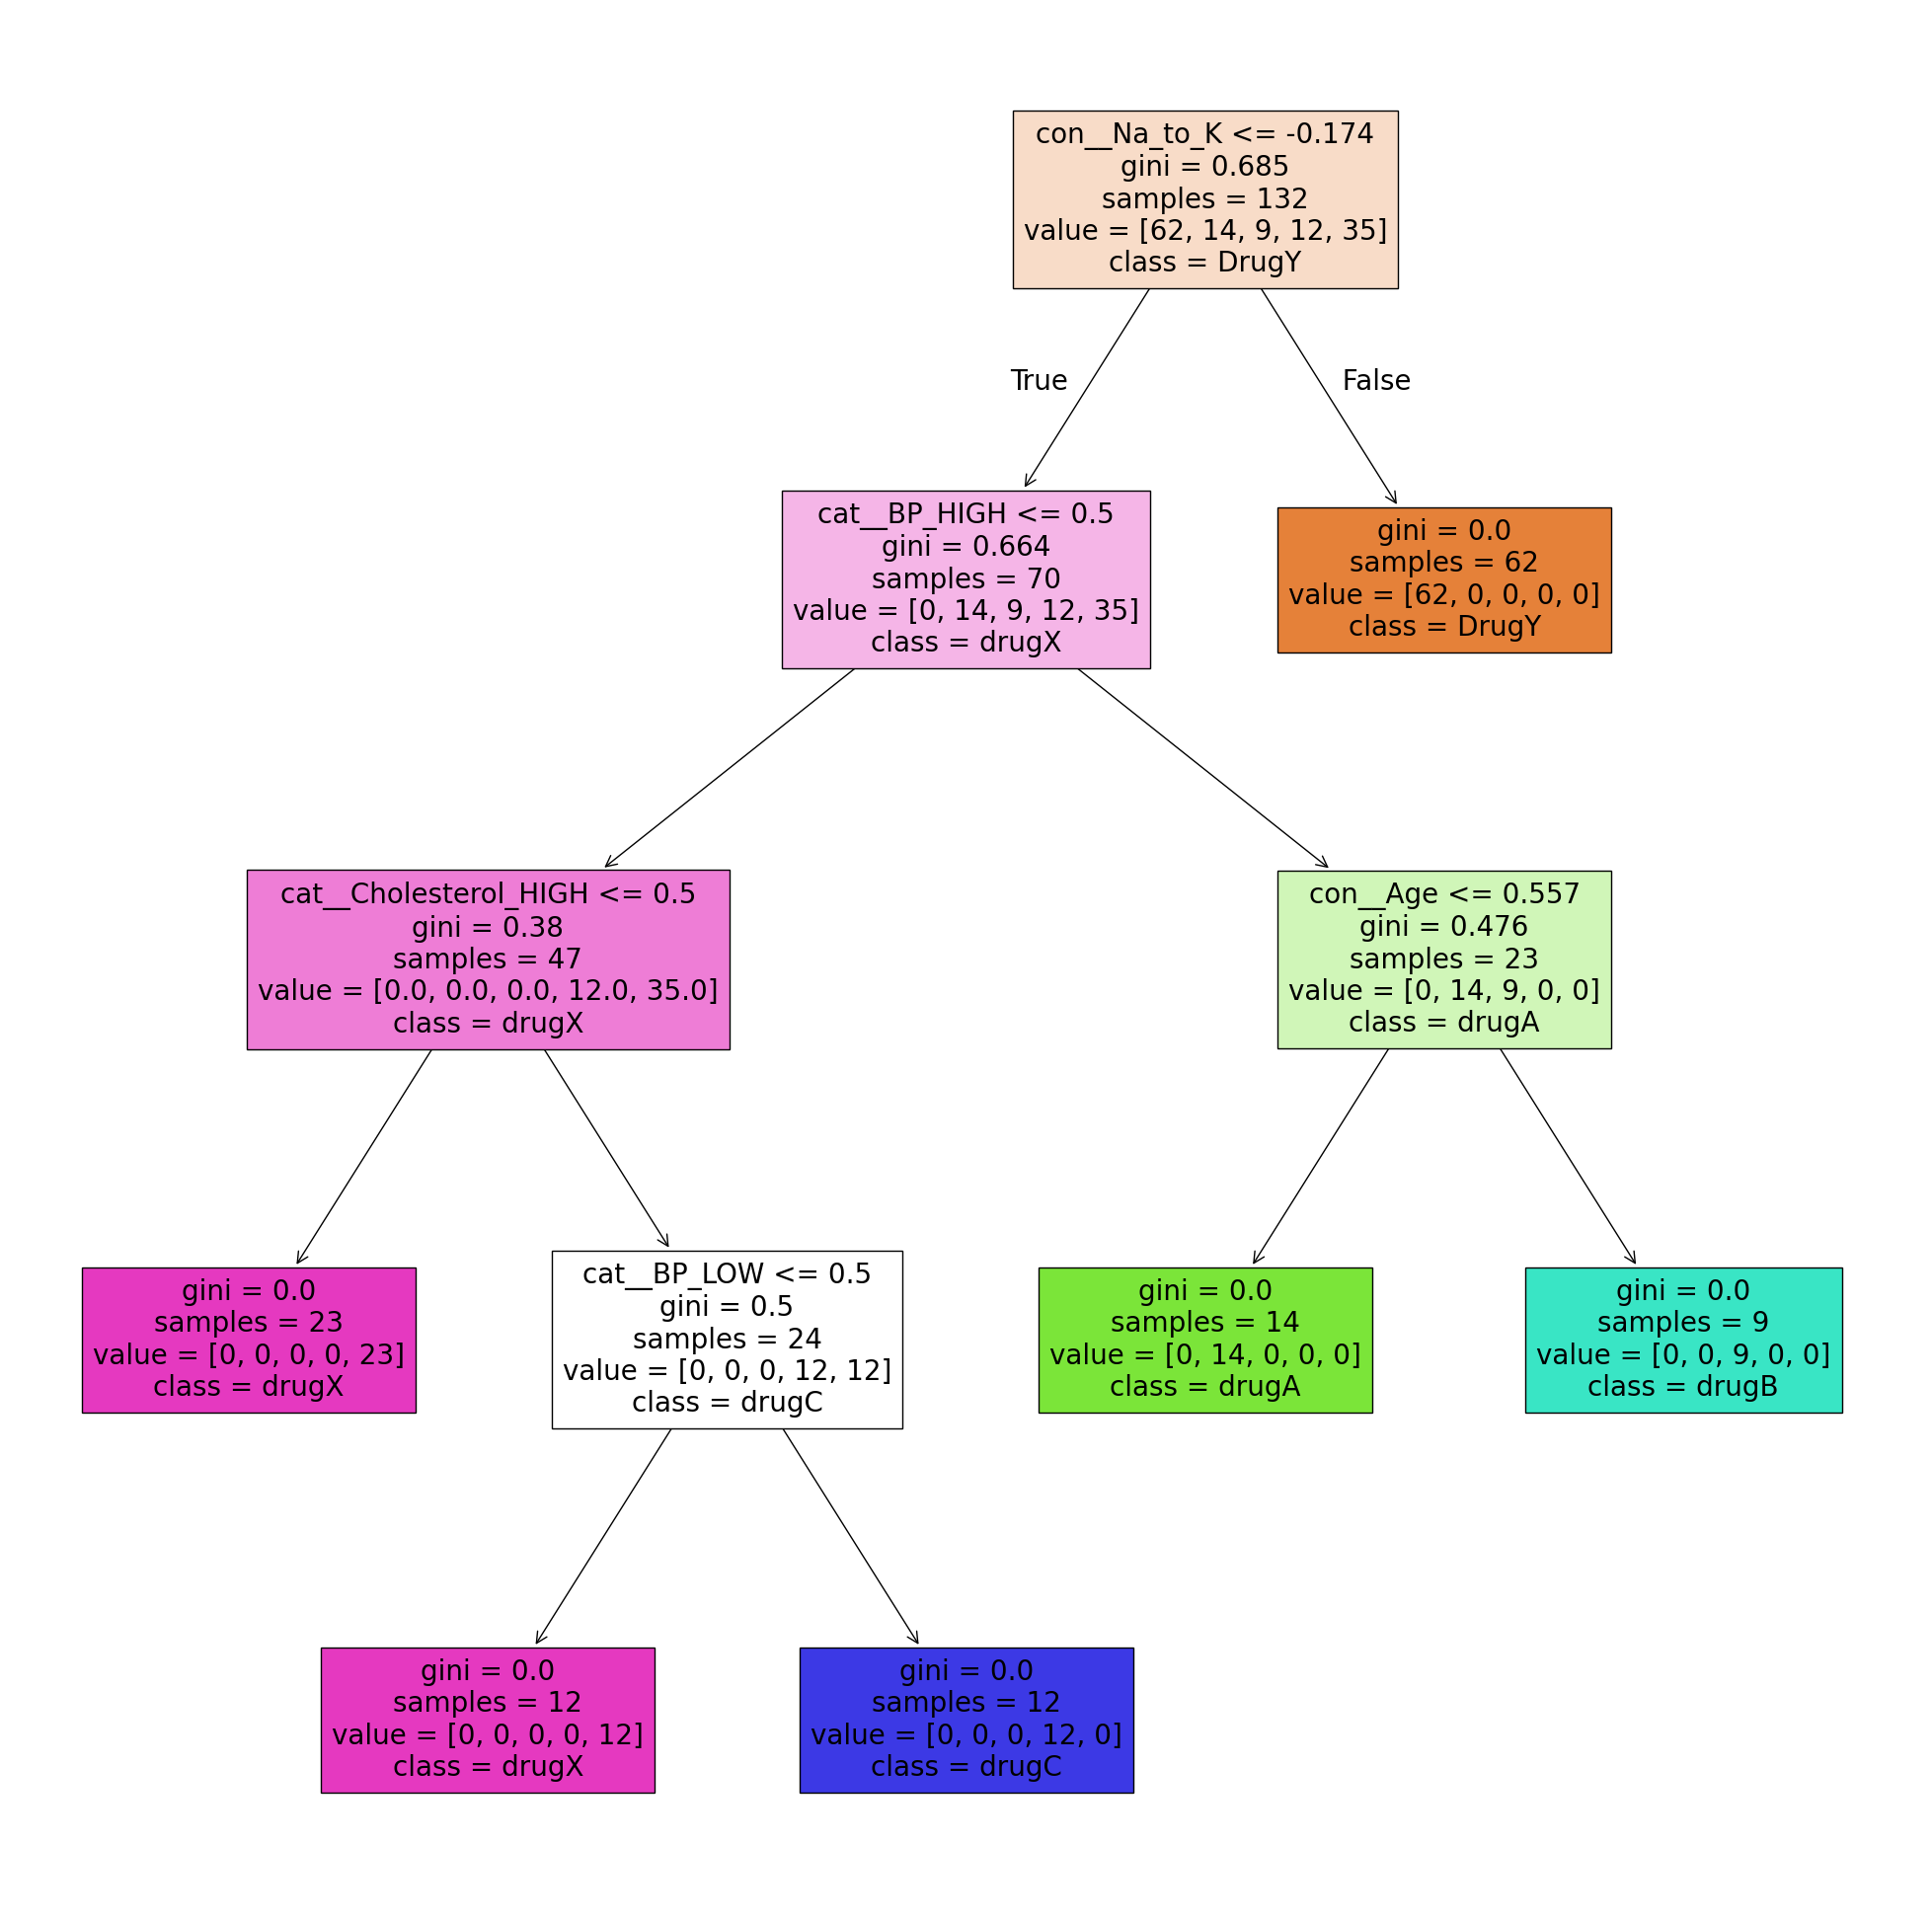

In [33]:
from sklearn.tree import plot_tree
fea_names = xtrain.columns

import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
plot_tree(best_dtc,feature_names=fea_names,class_names=best_dtc.classes_,filled=True)
plt.show()


Important features considered by the best_dtc model

In [34]:

best_dtc.feature_importances_

array([0.        , 0.        , 0.19529952, 0.13273002, 0.        ,
       0.06495299, 0.        , 0.12118827, 0.4858292 ])

In [35]:
best_dtc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [36]:
xtrain.columns

Index(['cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL',
       'con__Age', 'con__Na_to_K'],
      dtype='str')

In [37]:
pd.Series(best_dtc.feature_importances_,index=xtrain.columns)

cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__BP_HIGH               0.195300
cat__BP_LOW                0.132730
cat__BP_NORMAL             0.000000
cat__Cholesterol_HIGH      0.064953
cat__Cholesterol_NORMAL    0.000000
con__Age                   0.121188
con__Na_to_K               0.485829
dtype: float64

In [38]:
A = pd.Series(best_dtc.feature_importances_,index=xtrain.columns)
A.sort_values()

cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__Cholesterol_NORMAL    0.000000
cat__BP_NORMAL             0.000000
cat__Cholesterol_HIGH      0.064953
con__Age                   0.121188
cat__BP_LOW                0.132730
cat__BP_HIGH               0.195300
con__Na_to_K               0.485829
dtype: float64

Save the model and we can save the preprocessor pipeline

In [39]:
import joblib
joblib.dump(pre,'pre.joblib')
joblib.dump(best_dtc,'model.joblib')

['model.joblib']

In [40]:
pre2 = joblib.load('pre.joblib')
model2 = joblib.load('model.joblib')

Out of sample predictions

In [41]:
path2 = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/DrugTest.csv"
xnew = pd.read_csv(path2)
xnew.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN


In [42]:
# prepare the data
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.352186,0.934448
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.776354,0.155639
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.374607,-0.911824
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.435202,-0.704354
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.556393,0.000000


In [43]:
preds = model2.predict(xnew_pre)
preds

array(['DrugY', 'DrugY', 'drugX', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugC', 'drugC',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugA', 'drugB', 'drugC', 'DrugY', 'drugA',
       'drugB', 'drugA', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX',
       'drugX', 'drugX', 'DrugY', 'drugA', 'drugX', 'drugB', 'DrugY',
       'DrugY'], dtype=object)

In [44]:

xnew['Drug_Predictions'] = preds
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Predictions
0,22.0,F,HIGH,NORMAL,22.818,DrugY
1,15.0,M,HIGH,NORMAL,17.206,DrugY
2,67.0,M,NORMAL,NORMAL,9.514,drugX
3,68.0,M,NaN,HIGH,11.009,drugB
4,70.0,F,NORMAL,HIGH,NaN,DrugY
5,67.0,F,NORMAL,HIGH,15.891,DrugY
6,NaN,M,NORMAL,HIGH,25.786,DrugY
7,51.0,M,HIGH,NORMAL,11.343,drugA
8,23.0,F,HIGH,HIGH,25.355,DrugY
9,35.0,M,LOW,NORMAL,9.170,drugX


In [45]:
## Save the file
xnew.to_csv("Drug Predictions.csv",index=False)